## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [1]:
# packages import
import requests
import json
import pandas as pd
import numpy as np

Login to api

In [2]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [3]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,6079a65cd131ef46643cd44d.98d387415c787fead7f36...


get devices data

In [4]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

payload = json.dumps([
  {
    "data": [],
    "count": 2,
    "meta": {}
  }
])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers, data=payload)
#print(devices_response.text)


In [5]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607906bc4568aa5ea543c9e0', 'keys': [...",[],[],"{'_id': '607906bc4568aa5ea543c9e0', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '6079a0b9d131ef46643c3272', 'keys': [...",[],[],"{'_id': '6079a0b9d131ef46643c3272', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60793e43100aad2989c9ebba', 'keys': [...",[],[],"{'_id': '60793e43100aad2989c9ebba', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '6079a0c11ef743213d9aa8f8', 'keys': [...",[],[],"{'_id': '6079a0c11ef743213d9aa8f8', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '6079a0e61ef743213d9aac8a', 'keys': [...",[],[],"{'_id': '6079a0e61ef743213d9aac8a', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '6079a0d31ef743213d9aaa87', 'keys': [...",[],[],"{'_id': '6079a0d31ef743213d9aaa87', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


In [6]:
url = "https://www.iofrog.com/api/v2/devices/1F2504E/messages/"

payload = json.dumps({
  "data": [
    {
      "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
      "isAlarm": False,
      "isDismissed": False,
      "timestamp": 1584093653,
      "type": "data_uplink",
      "seqNumber": 1,
      "keys": [
        {
          "isCode": False,
          "_id": "1111111111111111111111",
          "key": "key",
          "value": "value",
          "keyLocale": "Klíč",
          "valueLocale": "Hodnota",
          "color": "alarm",
          "icon": "icon name (from fontAwesome)"
        }
      ]
    }
  ],
  "count": 1
})
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

message_response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)


In [7]:
# data prep


message_dict = json.loads(message_response.text)
#print(message_dict['data'])
message_data = pd.DataFrame.from_dict(message_dict['data'])

message_data = message_data.drop(columns=['keys'])

message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
message_data_keys.reset_index(inplace=True)
message_data_keys = message_data_keys.groupby('_id').sum()
#print(message_data_keys)
# join df's
message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)

message_data



,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,mode,...,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge
0,6079a0b9d131ef46643c3272,1618583736,data_bidir,235,1F2504E,2021-04-16T14:35:37.944Z,0,orientation_changed,0,put_me_back,...,16,32,-16,1008,1008,992,0,48,-32,both
1,6079a075d131ef46643c2bd8,1618583667,data_bidir,234,1F2504E,2021-04-16T14:34:29.193Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2,6079876f1ef743213d96b3ac,1618577262,data_bidir,233,1F2504E,2021-04-16T12:47:43.165Z,0,orientation_changed,0,put_me_back,...,16,32,-112,1008,1040,992,-16,0,-176,both
3,6079870b1ef743213d96a36c,1618577162,data_bidir,232,1F2504E,2021-04-16T12:46:03.660Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
4,6079624cef04aa4ffb43c5ea,1618567756,data_bidir,231,1F2504E,2021-04-16T10:09:16.944Z,0,heartbeat_2,2.9,put_me_back,...,0,0,0,0,0,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6073e69e3625b3466a7a37d8,1618208412,data_bidir,140,1F2504E,2021-04-12T06:20:14.301Z,0,orientation_changed,0,put_me_back,...,16,16,0,1008,1008,992,0,0,-96,both
96,6073e658914447151b6f6dbf,1618208344,data_bidir,139,1F2504E,2021-04-12T06:19:04.995Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
97,60738470914447151b685688,1618183279,data_bidir,138,1F2504E,2021-04-11T23:21:20.591Z,0,heartbeat_2,2.9,put_me_back,...,0,0,0,0,0,0,0,0,0,both
98,6073167c914447151b5debdc,1618155131,data_bidir,137,1F2504E,2021-04-11T15:32:12.447Z,0,orientation_changed,0,put_me_back,...,16,32,16,1008,1008,1008,0,0,-16,both


In [8]:
message_data['action'].value_counts()

first_move             41
orientation_changed    41
heartbeat_2            14
heartbeat_1             4
Name: action, dtype: int64

In [9]:
message_data_tilt = message_data[message_data.action == 'first_move']
message_data_tilt.head(8)

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,mode,...,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge
1,6079a075d131ef46643c2bd8,1618583667,data_bidir,234,1F2504E,2021-04-16T14:34:29.193Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
3,6079870b1ef743213d96a36c,1618577162,data_bidir,232,1F2504E,2021-04-16T12:46:03.660Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
6,60795ed4ef04aa4ffb4359af,1618566867,data_bidir,229,1F2504E,2021-04-16T09:54:28.580Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
9,6078cfe38227aa5e85770298,1618530273,data_bidir,226,1F2504E,2021-04-15T23:44:35.091Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
11,607890974568aa5ea53dce1a,1618514071,data_bidir,224,1F2504E,2021-04-15T19:14:31.817Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
15,607877144568aa5ea53bbafd,1618507539,data_bidir,220,1F2504E,2021-04-15T17:25:40.612Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
17,6078528a4568aa5ea53709de,1618498185,data_bidir,218,1F2504E,2021-04-15T14:49:46.728Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
19,607846a18227aa5e856a27ac,1618495135,data_bidir,216,1F2504E,2021-04-15T13:58:57.500Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both


In [10]:
message_data_tilt = message_data_tilt[['created', 'action']]
message_data_tilt.index = message_data_tilt.created
message_data_tilt['count'] = np.where(message_data_tilt['action'] == 'first_move', 1, 0)
message_data_tilt.head(8)

,created,action,count
created,,,
2021-04-16T14:34:29.193Z,2021-04-16T14:34:29.193Z,first_move,1
2021-04-16T12:46:03.660Z,2021-04-16T12:46:03.660Z,first_move,1
2021-04-16T09:54:28.580Z,2021-04-16T09:54:28.580Z,first_move,1
2021-04-15T23:44:35.091Z,2021-04-15T23:44:35.091Z,first_move,1
2021-04-15T19:14:31.817Z,2021-04-15T19:14:31.817Z,first_move,1
2021-04-15T17:25:40.612Z,2021-04-15T17:25:40.612Z,first_move,1
2021-04-15T14:49:46.728Z,2021-04-15T14:49:46.728Z,first_move,1
2021-04-15T13:58:57.500Z,2021-04-15T13:58:57.500Z,first_move,1


In [11]:
# message_data[message_data['action'] == 'reed_counter'].counter.plot()

In [12]:
message_data.index = pd.to_datetime(message_data.created)
message_data.sort_index(ascending=True, inplace=True)
message_data

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,mode,...,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge
created,,,,,,,,,,,,,,,,,,,,,
2021-04-11 15:31:05.718000+00:00,607316393625b3466a68b3fe,1618155062,data_bidir,136,1F2504E,2021-04-11T15:31:05.718Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2021-04-11 15:32:12.447000+00:00,6073167c914447151b5debdc,1618155131,data_bidir,137,1F2504E,2021-04-11T15:32:12.447Z,0,orientation_changed,0,put_me_back,...,16,32,16,1008,1008,1008,0,0,-16,both
2021-04-11 23:21:20.591000+00:00,60738470914447151b685688,1618183279,data_bidir,138,1F2504E,2021-04-11T23:21:20.591Z,0,heartbeat_2,2.9,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2021-04-12 06:19:04.995000+00:00,6073e658914447151b6f6dbf,1618208344,data_bidir,139,1F2504E,2021-04-12T06:19:04.995Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2021-04-12 06:20:14.301000+00:00,6073e69e3625b3466a7a37d8,1618208412,data_bidir,140,1F2504E,2021-04-12T06:20:14.301Z,0,orientation_changed,0,put_me_back,...,16,16,0,1008,1008,992,0,0,-96,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16 10:09:16.944000+00:00,6079624cef04aa4ffb43c5ea,1618567756,data_bidir,231,1F2504E,2021-04-16T10:09:16.944Z,0,heartbeat_2,2.9,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2021-04-16 12:46:03.660000+00:00,6079870b1ef743213d96a36c,1618577162,data_bidir,232,1F2504E,2021-04-16T12:46:03.660Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,0,0,both
2021-04-16 12:47:43.165000+00:00,6079876f1ef743213d96b3ac,1618577262,data_bidir,233,1F2504E,2021-04-16T12:47:43.165Z,0,orientation_changed,0,put_me_back,...,16,32,-112,1008,1040,992,-16,0,-176,both


In [13]:
message_data['count'] = np.where(message_data['action'] == 'first_move', 1, 0)
message_data['counter'] = np.cumsum(message_data['count'])
#message_data['angle'] = np.where(message_data['action'] == 'orientation_changed', 'angle', 0)
message_data.head(5)

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,mode,...,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min,_merge,count,counter
created,,,,,,,,,,,,,,,,,,,,,
2021-04-11 15:31:05.718000+00:00,607316393625b3466a68b3fe,1618155062,data_bidir,136,1F2504E,2021-04-11T15:31:05.718Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,both,1,1
2021-04-11 15:32:12.447000+00:00,6073167c914447151b5debdc,1618155131,data_bidir,137,1F2504E,2021-04-11T15:32:12.447Z,0,orientation_changed,0,put_me_back,...,16,1008,1008,1008,0,0,-16,both,0,1
2021-04-11 23:21:20.591000+00:00,60738470914447151b685688,1618183279,data_bidir,138,1F2504E,2021-04-11T23:21:20.591Z,0,heartbeat_2,2.9,put_me_back,...,0,0,0,0,0,0,0,both,0,1
2021-04-12 06:19:04.995000+00:00,6073e658914447151b6f6dbf,1618208344,data_bidir,139,1F2504E,2021-04-12T06:19:04.995Z,0,first_move,0,put_me_back,...,0,0,0,0,0,0,0,both,1,2
2021-04-12 06:20:14.301000+00:00,6073e69e3625b3466a7a37d8,1618208412,data_bidir,140,1F2504E,2021-04-12T06:20:14.301Z,0,orientation_changed,0,put_me_back,...,0,1008,1008,992,0,0,-96,both,0,2


In [14]:
message_data[['action','count', 'counter']]

,action,count,counter
created,,,
2021-04-11 15:31:05.718000+00:00,first_move,1,1
2021-04-11 15:32:12.447000+00:00,orientation_changed,0,1
2021-04-11 23:21:20.591000+00:00,heartbeat_2,0,1
2021-04-12 06:19:04.995000+00:00,first_move,1,2
2021-04-12 06:20:14.301000+00:00,orientation_changed,0,2
...,...,...,...
2021-04-16 10:09:16.944000+00:00,heartbeat_2,0,39
2021-04-16 12:46:03.660000+00:00,first_move,1,40
2021-04-16 12:47:43.165000+00:00,orientation_changed,0,40


<AxesSubplot:xlabel='created'>

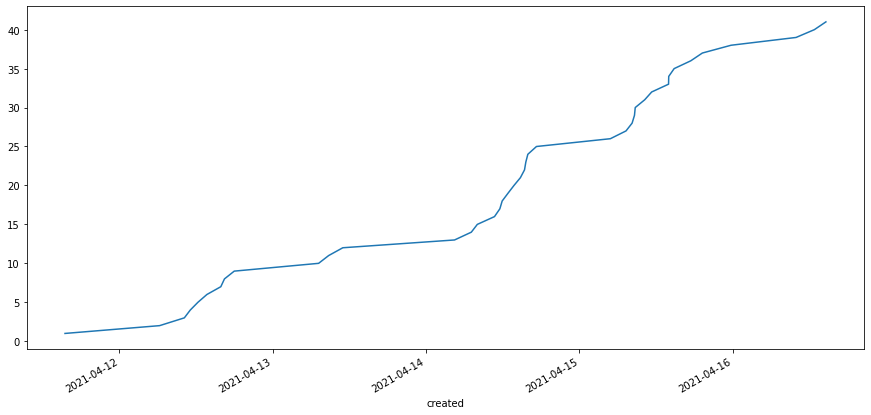

In [15]:
message_data[message_data['action'] == 'first_move']['counter'].plot(figsize=(15,7))

drive api (testing still)

In [16]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

ModuleNotFoundError: No module named 'pydrive'

In [ ]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

In [ ]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')

In [ ]:
print(fileCons)